# **Model Selection**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline 
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# Logistic Regression
The data set has been prepared to be fed into a machine learning algorithm. Feature columns selection is necessary for the Logistic Regression Model

In [2]:
# load loan data frame
loan = pd.read_csv('result1.csv', index_col=0)

In [3]:
loan.head()

,loan_amnt,term,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,total_rev_hi_lim,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,5000.0,36.0,162.87,2,10.0,24000.0,1,27.65,0.0,1.0,...,23700.0,0,0,0,0,0,1,0,0,1
1,2500.0,60.0,59.83,3,1.0,30000.0,0,1.00,0.0,5.0,...,23700.0,0,0,0,0,0,1,0,1,0
2,2400.0,36.0,84.33,3,10.0,12252.0,1,8.72,0.0,2.0,...,23700.0,0,0,0,0,0,1,1,0,0
3,10000.0,36.0,339.31,3,10.0,49200.0,1,20.00,0.0,1.0,...,23700.0,0,0,0,0,0,1,0,1,0
5,5000.0,36.0,156.46,1,3.0,36000.0,1,11.20,0.0,3.0,...,23700.0,0,0,0,0,0,1,0,1,0


In [6]:
# Index of columns
loan.columns

Index([u'loan_amnt', u'term', u'installment', u'grade', u'emp_length',
       u'annual_inc', u'loan_status', u'dti', u'delinq_2yrs',
       u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util',
       u'total_acc', u'initial_list_status', u'last_pymnt_amnt',
       u'collections_12_mths_ex_med', u'tot_coll_amt', u'tot_cur_bal',
       u'total_rev_hi_lim', u'home_ownership_ANY', u'home_ownership_MORTGAGE',
       u'home_ownership_NONE', u'home_ownership_OTHER', u'home_ownership_OWN',
       u'home_ownership_RENT', u'verification_status_Not Verified',
       u'verification_status_Source Verified',
       u'verification_status_Verified'],
      dtype='object')

In [7]:
# create feature matrix (X)
feature_cols = loan.columns.drop(['loan_status', 'dti', 'inq_last_6mths', 'pub_rec', 'revol_util', 
                                 'collections_12_mths_ex_med', 'total_rev_hi_lim', 'home_ownership_ANY', 
                                  'delinq_2yrs'])
X = loan[feature_cols]

# create response vector (y)
y = loan.loan_status


In [9]:
# feature columnss
X.head()

,loan_amnt,term,installment,grade,emp_length,annual_inc,open_acc,revol_bal,total_acc,initial_list_status,...,tot_coll_amt,tot_cur_bal,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,5000.0,36.0,162.87,2,10.0,24000.0,3.0,13648.0,9.0,1,...,0.0,80559.0,0,0,0,0,1,0,0,1
1,2500.0,60.0,59.83,3,1.0,30000.0,3.0,1687.0,4.0,1,...,0.0,80559.0,0,0,0,0,1,0,1,0
2,2400.0,36.0,84.33,3,10.0,12252.0,2.0,2956.0,10.0,1,...,0.0,80559.0,0,0,0,0,1,1,0,0
3,10000.0,36.0,339.31,3,10.0,49200.0,10.0,5598.0,37.0,1,...,0.0,80559.0,0,0,0,0,1,0,1,0
5,5000.0,36.0,156.46,1,3.0,36000.0,9.0,7963.0,12.0,1,...,0.0,80559.0,0,0,0,0,1,0,1,0


In [10]:
y.sample(5)

313868    0
872067    1
867047    1
810490    1
677152    1
Name: loan_status, dtype: int64

In [11]:
# Split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=99)

/Users/davidkeya/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
# Shape of the new X objects
print X_train.shape
print X_test.shape

(153401, 21)
(102268, 21)


In [13]:
# Shape of the new y response
print y_train.shape
print y_test.shape

(153401,)
(102268,)


In [14]:
# Train the model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# Making predictions on the testing set
y_pred = logreg.predict(X_test)

In [16]:
# Comparing actual response values of y_test and the predicted values y_pred
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred)

0.852524738921


 ### Logistic Regression Testing Accuracy
 - **After making predictions on the testing set, the model achieves a testing accuracy of 85.2% is achieved.** 

## KNN Classification
Use KNN with K=5

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Calculating the accuracy score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
yk_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, yk_pred)

0.851204677905


### Determining a better value of K
**Testing accuracy** worked out for k ranging from 1 to 20

In [47]:
# Testing accuracy for k ranging from 1 to 20
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [51]:
# Create a DataFrame of K and scores
column_dict = {'K':k_range, 'accuracy score':scores}
df = pd.DataFrame(column_dict).set_index('K')
df

,accuracy score
K,
1,0.831570
2,0.813607
3,0.844546
4,0.838728
5,0.851205
6,0.849855
7,0.855820
8,0.855243
9,0.858793


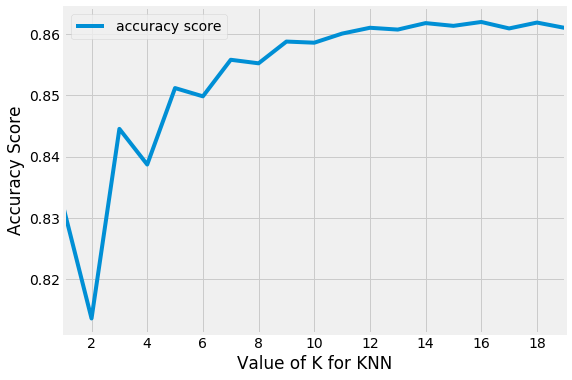

In [49]:
# Plot the relationship between K and Accuracy score.
df.plot(y='accuracy score');
plt.xlabel('Value of K for KNN');
plt.ylabel('Accuracy Score');

In [52]:
# Find the maximum accuracy score and the associated K value.
df.sort_values('accuracy score').head().sort_index(ascending=False)

,accuracy score
K,
6,0.849855
4,0.838728
3,0.844546
2,0.813607
1,0.831570


## Conclusion
- **When using KNN on this data set with the selected features, the best value for K at 16 and 18**
- **The model achieves a testing accuracy of 82.3%**

# Classification Using Decision Trees 
This method classifies a population into branch-like segments that construct an inverted tree with a root node, internal nodes, and leaf nodes. The algorithm is non-parametric and can efficiently deal with large, complicated datasets without imposing a complicated parametric structure.

 **Building a classification tree using the Loan data set**
- First find the best max_depth for the decision tree using cross validation

In [19]:
from sklearn.tree import DecisionTreeClassifier
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))

# Store the average RMSE for each value of max_depth in the list
RMSE_scores = []

#10-fold cross-validation with each value of max_depth used.
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeClassifier(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))


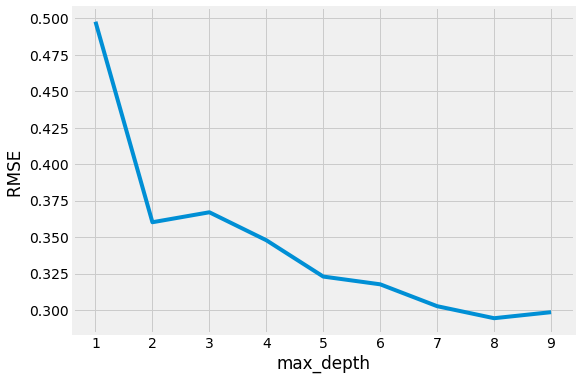

In [20]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE ');

- ** A lower RMSE is better**
- ** From the above plot Max dept of around 8 has the least RMSE score**
- ** Fit the tree with max_depth=8**

In [21]:
# Fit a classification tree with max_depth=8 on all data.
treeclf = DecisionTreeClassifier(max_depth=8, random_state=99)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [35]:
# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}).sort_values(by='importance', 
                                                                                              ascending=False)

,feature,importance
10,last_pymnt_amnt,0.662615
1,term,0.132081
12,tot_cur_bal,0.103070
2,installment,0.052520
3,grade,0.041712
0,loan_amnt,0.005031
5,annual_inc,0.000835
9,initial_list_status,0.000756
7,revol_bal,0.000710
6,open_acc,0.000262


In [41]:
# Create a Graphviz file.
from sklearn.tree import export_graphviz
export_graphviz(treeclf, out_file='./tree_loan.dot', feature_names=feature_cols)